In [15]:
%matplotlib inline
import pylab
import pandas as pd

## load mapping summary CSVs and gather CSV

In [16]:
sample_id='SRR606249'
#sample_id = 'p8808mo9'
#sample_id = 'p8808mo11'


# load mapping CSVs
all_df = pd.read_csv(f'outputs/minimap/depth/{sample_id}.summary.csv')
left_df = pd.read_csv(f'outputs/leftover/depth/{sample_id}.summary.csv')

# load gather CSV
gather_df = pd.read_csv(f'outputs/{sample_id}.gather.csv')

# names!
names_df = pd.read_csv(f'{sample_id}.acc.urls.csv')

# connect gather_df to all_df and left_df using 'genome_id'
def fix_name(x):
    return "_".join(x.split('_')[:2]).split('.')[0]

gather_df['genome_id'] = gather_df['name'].apply(fix_name)
names_df['genome_id'] = names_df['acc'].apply(fix_name)

In [17]:
# CTB bug FIXME
# this ensures that only rows that share genome_id are in all the dataframes
in_gather = set(gather_df.genome_id)
in_left = set(left_df.genome_id)

in_both = in_left.intersection(in_gather)

all_df = all_df[all_df.genome_id.isin(in_both)]
left_df = left_df[left_df.genome_id.isin(in_both)]
gather_df = gather_df[gather_df.genome_id.isin(in_both)]
names_df = names_df[names_df.genome_id.isin(in_both)]

# reassign index now that we've maybe dropped rows
all_df.index = range(len(all_df))
left_df.index = range(len(left_df))
gather_df.index = range(len(gather_df))
names_df.index = range(len(names_df))

assert len(all_df) == len(gather_df)
assert len(left_df) == len(gather_df)
assert len(names_df) == len(gather_df)

In [18]:
# re-sort left_df and all_df to match gather_df order, using matching genome_id column
all_df.set_index("genome_id")
all_df.reindex(index=gather_df["genome_id"])
all_df.reset_index()

left_df.set_index("genome_id")
left_df.reindex(index=gather_df["genome_id"])
left_df.reset_index()

left_df["mapped_bp"] = (1 - left_df["percent missed"]/100) * left_df["genome bp"]

names_df.set_index("genome_id")
names_df.reindex(index=gather_df["genome_id"])
names_df.reset_index()

names_df[:3]

,acc,genome_url,assembly_report_url,ncbi_tax_name,genome_id
0,GCA_000013645.1,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,Paraburkholderia xenovorans LB400,GCA_000013645
1,GCA_000009705.1,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,Nostoc sp. PCC 7120 = FACHB-418,GCA_000009705
2,GCA_000196115.1,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,Rhodopirellula baltica SH 1,GCA_000196115


In [19]:
left_df[:5]

,Unnamed: 0,genome bp,missed,percent missed,coverage,genome_id,sample_id,mapped_bp
0,GCA_000013645,9731138,70330,0.722732,10.224036,GCA_000013645,SRR606249,9660808.0
1,GCA_000009705,7211789,174,0.002413,33.737305,GCA_000009705,SRR606249,7211615.0
2,GCA_000196115,7145576,104,0.001455,134.405926,GCA_000196115,SRR606249,7145472.0
3,GCA_000018565,6785430,631,0.009299,23.436817,GCA_000018565,SRR606249,6784799.0
4,GCA_002959695,6481410,13840,0.213534,24.524634,GCA_002959695,SRR606249,6467570.0


In [20]:
gather_df[:5]

,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,name,filename,md5,f_match_orig,unique_intersect_bp,gather_result_rank,remaining_bp,genome_id
0,9323000,0.024885,0.977254,0.024885,0.008649,6.831814,6.0,5.847358,GCA_000013645.1_ASM1364v1_genomic.fna.gz,all-gather-genomes.sbt.zip,ee9cb05018009af43429e83e7d502a0a,0.977254,9323000,0,365320000,GCA_000013645
1,7288000,0.019453,0.999040,0.019453,0.023517,23.763035,18.0,29.637611,GCA_000009705.1_ASM970v1_genomic.fna.gz,all-gather-genomes.sbt.zip,264cfdad44548ad96c4a24b6a514a877,0.999040,7288000,1,358032000,GCA_000009705
2,7039000,0.018789,0.999858,0.018789,0.089562,93.700242,92.0,27.877040,GCA_000196115.1_ASM19611v1_genomic.fna.gz,all-gather-genomes.sbt.zip,7141c3fbf206734950d13cadba0bf46c,0.999858,7039000,2,350993000,GCA_000196115
3,6604000,0.017627,0.999697,0.017627,0.014621,16.304058,16.0,6.636986,GCA_000018565.1_ASM1856v1_genomic.fna.gz,all-gather-genomes.sbt.zip,5165e0f27ae96c8a78da00c2d30a8e36,0.999697,6604000,3,344389000,GCA_000018565
4,6323000,0.016877,0.997948,0.016877,0.014897,17.349676,17.0,8.548490,GCA_002959695.1_ASM295969v1_genomic.fna.gz,all-gather-genomes.sbt.zip,cefca2cf1f2ffaacdd22d23b45bfb6cb,0.997948,6323000,4,338066000,GCA_002959695


In [21]:
# subsample? take top 60...

NUM=60

left_df = left_df[:NUM]
all_df = all_df[:NUM]
gather_df = gather_df[:NUM]
names_df = names_df[:NUM]

## fig 1: examining leftover reads, in order of gather

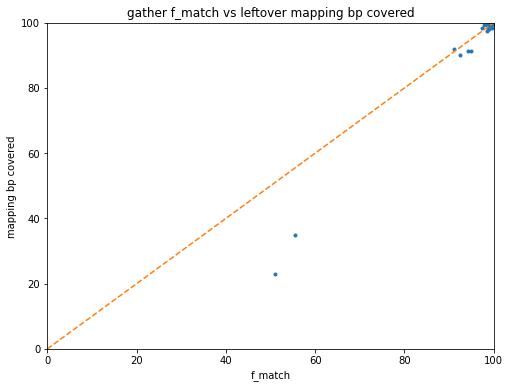

In [22]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(gather_df["f_match"]* 100, 100 - left_df["percent missed"], '.')

pylab.xlim(0, 100)
pylab.ylim(0, 100)
pylab.xlabel('f_match')
pylab.ylabel('mapping bp covered')
pylab.title('gather f_match vs leftover mapping bp covered')
pylab.plot([0, 100], [0, 100], '--')

## fig 2: fraction of hashes unique to query, in order of gather results

Text(0, 0.5, 'f_unique_to_query, as %')

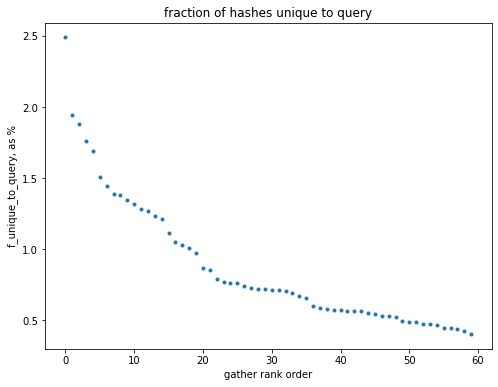

In [23]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(gather_df.index, gather_df["f_unique_to_query"]*100, '.')

pylab.title('fraction of hashes unique to query')
pylab.xlabel('gather rank order')
pylab.ylabel('f_unique_to_query, as %')

## fig 4: sum mapped bp and sum identified hashes, in order of gather

conclusion: across the gather run, total hashes identified correlate well with total bp mapped

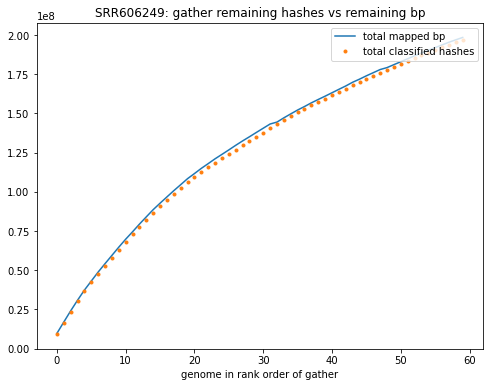

In [24]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(left_df.index, left_df["mapped_bp"].cumsum(), '-', label='total mapped bp')
pylab.plot(gather_df.index, gather_df["unique_intersect_bp"].cumsum(), '.', label='total classified hashes')

pylab.xlabel('genome in rank order of gather')
pylab.legend(loc='upper right')
pylab.title(f'{sample_id}: gather remaining hashes vs remaining bp')
pylab.savefig(f'/tmp/gather-{sample_id}.pdf')

## fig 5: mapped bp and identified hashes compared by sample, in order of gather

conclusion: for most samples, bp mapped to that genome matches # of hashes classified to that genome

note: hashes classified to this genome is monotonically decreasing, b/c gather is a greedy algorithm.

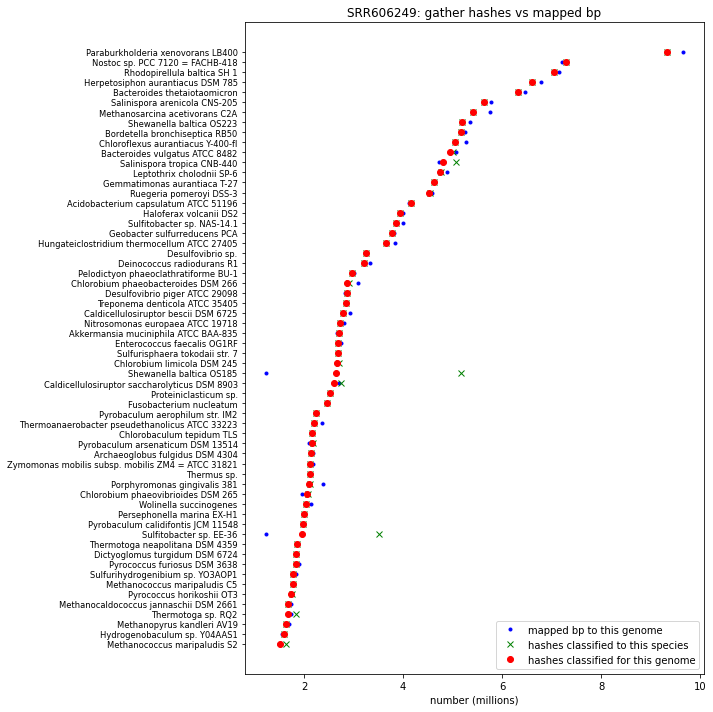

In [25]:
pylab.figure(num=None, figsize=(10, 10))

pylab.plot(left_df.mapped_bp / 1e6, left_df.iloc[::-1].index, 'b.', label='mapped bp to this genome')
pylab.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'gx', label='hashes classified to this species')
pylab.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='hashes classified for this genome')

positions = list(gather_df.index)
labels = list(reversed(names_df.ncbi_tax_name))
pylab.yticks(positions, labels, fontsize='small')

pylab.xlabel('number (millions)')
pylab.legend(loc='lower right')
pylab.title(f'{sample_id}: gather hashes vs mapped bp')
pylab.tight_layout()

pylab.savefig(f'/tmp/gather-{sample_id}.pdf')

## fig 6: difference between hashes ident and bp mapped

Text(0, 0.5, 'difference: hashcount - mapped bp')

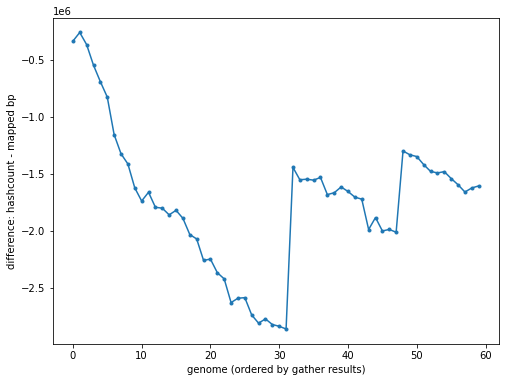

In [26]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(gather_df.index, gather_df.unique_intersect_bp.cumsum() - left_df.mapped_bp.cumsum(), '.-')

pylab.xlabel('genome (ordered by gather results)')
pylab.ylabel('difference: hashcount - mapped bp')

## fig 7: difference between hashes and bp, per sample

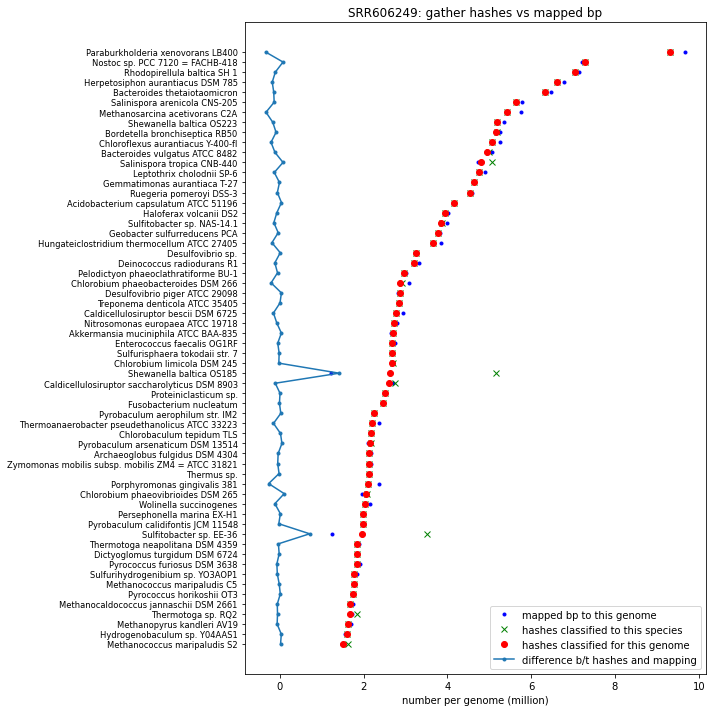

In [27]:
pylab.figure(num=None, figsize=(10, 10))

pylab.plot(left_df.mapped_bp / 1e6, left_df.iloc[::-1].index, 'b.', label='mapped bp to this genome')
pylab.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'gx', label='hashes classified to this species')
pylab.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='hashes classified for this genome')

pylab.plot((gather_df.unique_intersect_bp - left_df.mapped_bp) / 1e6, gather_df.iloc[::-1].index, 
           '.-', label='difference b/t hashes and mapping')

positions = list(gather_df.index)
labels = list(reversed(names_df.ncbi_tax_name))
pylab.yticks(positions, labels, fontsize='small')

#pylab.ylabel('genome (ordered by gather results)')
pylab.xlabel('number per genome (million)')
pylab.legend(loc='lower right')
pylab.title(f'{sample_id}: gather hashes vs mapped bp')
pylab.tight_layout()
pylab.savefig(f'/tmp/gatherdiff-{sample_id}.pdf')
pylab.savefig(f'/tmp/gatherdiff-{sample_id}.svg')